# Background

##Natural Language Processing

Natural Language Processing, or NLP, is the overlap of Computer Science and Linguistics that focuses on using computers to better understand human language. Language can be broken down into patterns – think sentence trees or conjugating verbs – and with those patterns, as well as statistical and machine learning modules, we can train computers to start “understanding” and analyzing human speech. Natural language processing is much more common than you may realize, as it is used for many voice recognition systems, such as voice activated GPS, robo-calls, online customer service chats, and virtual assistants such as Siri and Alexa. One recent, fairly recognizable example of NLP is Chat GPT, which allows users to ask questions and have conversations with the AI Chat GPT. These conversations often sound impressively human. Using natural language processing, computers are able to process language similar to the way humans can. To do this, words and documents need to be broken down into smaller pieces computers can understand. This is called tokenization. There are many different types of tokenization, but we will be working specifically with sentence and word tokenization. Sentence tokenization takes a literary work and breaks it down by sentence. This is generally done by examining end punctuation. Word tokenization breaks down paragraphs or other written works by word, which is done by looking at where spaces appear.

**Motivation**

NLP has many uses, but one of the most interesting uses we found for it is Forensic Linguistics. Forensic Linguistics is the overlap of forensic science – using science to gather evidence in criminal cases, like DNA or fingerprints – and linguistics. One part of forensic linguistics is proving authorship. A linguistic expert, or team of linguistic experts, is given writing by an unknown author as well as writings from a suspect or suspects. The experts then use aspects of the suspects’ writings and compare them to the aspects of the unknown author’s writing to see if they match. For example, they look for phrases common in certain geographic areas (like “Duck Duck Gray Duck” instead of “Duck Duck Goose”) or certain age groups. They can also look at the syntax of the authors to determine which “proper” English rules the authors break and how often they use different types of punctuation. They can even look for things as simple as spelling errors consistent between authors. 

We were interested in trying to mimic this while adding elements of probability and statistics. This would allow us opportunities to quantify how similar or different certain writings are. We could find basic statistics for different written works, such as mean sentence and word length, as well as finding the most frequently used words by authors. From these distributions, we were curious if we could create a way to determine authorship of a piece of writing with some degree of certainty.

To do this, we relied heavily on word and sentence tokenization in Python. We used the Natural Language Toolkit, or NLTK, which has built-in tokenization functions. NLTK uses an algorithm similar to the Penn TreeBank Tokenization method, which is built off of white space tokenization. It has a large bank of information to tokenize, so it recognizes contractions, hyphenated words, and punctuation as singular tokens instead of breaking them up like white space tokenization would do. This allowed us to isolate words or punctuation, as well as finding the length of sentences and words. 


##Demonstration

In [ ]:
#Import the tokenizing functions from the Natural Language Tool Kit (nltk)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
#and pandas
import pandas as pd
#and seaborn
import seaborn as sns
#and pyplot
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
quote = """"This is our test quote. It has multiple sentences, 
            and multiple words. There some are repeating words. 
            Let's demonstrate."""

Now that we have a string to work with, we can tokenize by sentence. This puts the sentences from the string into one list.

In [ ]:
sent_list = sent_tokenize(quote)
sent_list

['"This is our test quote.',
 'It has multiple sentences, \n            and multiple words.',
 'There some are repeating words.',
 "Let's demonstrate."]

Now, let's tokenize by word. This puts all of the words into one list.

In [ ]:
word_list = word_tokenize(quote)
word_list

['``',
 'This',
 'is',
 'our',
 'test',
 'quote',
 '.',
 'It',
 'has',
 'multiple',
 'sentences',
 ',',
 'and',
 'multiple',
 'words',
 '.',
 'There',
 'some',
 'are',
 'repeating',
 'words',
 '.',
 'Let',
 "'s",
 'demonstrate',
 '.']

Notice that this function includes punctuation and 's as separate words. Let's remove these.

In [ ]:
takeout = ['.',',','!',"?","'s", '``']
final_word_list = [word.lower() for word in word_list if word not in takeout]
final_word_list

['this',
 'is',
 'our',
 'test',
 'quote',
 'it',
 'has',
 'multiple',
 'sentences',
 'and',
 'multiple',
 'words',
 'there',
 'some',
 'are',
 'repeating',
 'words',
 'let',
 'demonstrate']

Now that we understand both sentence and word tokenization, let's put them together. Let's make a frequency list, or dictionary, of sentence lengths. Find the number of words in each sentence, then save how many sentences of each length there are.

In [ ]:
sent_dict = {}
for sentence in sent_list:
    #tokenize the sentence by word
    words_in_sent = word_tokenize(sentence)
    #take out the words we need to take out
    words_clean = [word for word in words_in_sent if word not in takeout]
    #find the sentence length based on the number of words in the sentence
    sent_length = len(words_clean)
    #if that length has already been found
    if sent_length in sent_dict:
        #increment its frequency by one
        sent_dict[sent_length] += 1
       #otherwise, set the frequency to one 
    else:
        sent_dict[sent_length] = 1
sent_dict

{5: 2, 7: 1, 2: 1}

Let's do the same thing with word frequency. Instead of finding lengths, let's see how often each word appears in the quote.

Since this example is so small, we're not going to worry about taking out the super common words like "the", "a", and "to", which are called stop words. In the application we'll remove those so the words we do look at will be more unique based on the author.

In [ ]:
word_dict = {}
for word in final_word_list:
    #if the word has already been found
    if word in word_dict:
        #increment the frequency by one
        word_dict[word] +=1
        #otherwise, set the frequency to one
    else:
        word_dict[word] = 1
word_dict

{'this': 1,
 'is': 1,
 'our': 1,
 'test': 1,
 'quote': 1,
 'it': 1,
 'has': 1,
 'multiple': 2,
 'sentences': 1,
 'and': 1,
 'words': 2,
 'there': 1,
 'some': 1,
 'are': 1,
 'repeating': 1,
 'let': 1,
 'demonstrate': 1}

Let's do this with word length as well.

In [ ]:
wl_dict = {}
total_count_list = []
for word in final_word_list:
    #find the length of the word
    word_length = len(word)
    total_count_list.append(word_length)
    #if the word length has already occurred
    if word_length in wl_dict:
        #increment the length frequency by one
        wl_dict[word_length] += 1
        #otherwise, set the frequency to one
    else:
        wl_dict[word_length] = 1
wl_dict

{4: 3, 2: 2, 3: 5, 5: 4, 8: 2, 9: 2, 11: 1}

Let's put the dictionary in order by length of the word.


In [ ]:
#sort the keys from the dictionary so they are in order -- this creates a list
sorted_wl = sorted(wl_dict)

#create the sorted dictionary
sorted_wl_dict = {}

#for each key in the sorted list
for wl in sorted_wl:
    
    #add the key to the sorted dictionary 
    #along with its value from the unsorted dictionary
    sorted_wl_dict[wl] = wl_dict[wl]
sorted_wl_dict

{2: 2, 3: 5, 4: 3, 5: 4, 8: 2, 9: 2, 11: 1}

Finally, let's put this into a pandas Dataframe, as they're easier to work with when comparing multiple data sets.

In [ ]:
#make the sorted dictionary into a pandas dataframe
sorted_df = pd.DataFrame(list(sorted_wl_dict.items()), 
                         columns = ['Word Length', 'Frequency of Length'])
sorted_df

,Word Length,Frequency of Length
0,2,2
1,3,5
2,4,3
3,5,4
4,8,2
5,9,2
6,11,1


Now, we can visualize the data by graphing it.

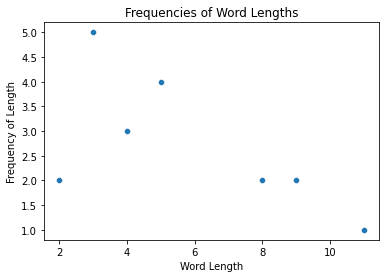

In [ ]:
sns.scatterplot(data = sorted_df, x = "Word Length", y = "Frequency of Length")
plt.title("Frequencies of Word Lengths")
plt.show()

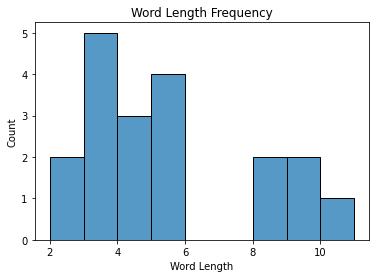

In [ ]:
sns.histplot(data = total_count_list, binwidth = 1)
plt.xlabel("Word Length")
plt.title("Word Length Frequency")
plt.show()

This was a pretty simple example, just to show the basics of natural language processing, but this is really the core of what we did. Next, let's look at a larger-scale example.

# Larger Examples

##How to get data from textual input

First, we're going to read in the text files and separate them by author. These files were obtained from [Project Gutenberg](https://www.gutenberg.org/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Dickens: great_expectations, oliver_twist, tale_of_two_cities
#Stoker:  dracula, lady_of_the_shroud, lair_of_the_white_worm 
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/great_expectations.txt') as f:
  ge = f.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/oliver_twist.txt') as g:
  ot = g.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/tale_of_two_cities.txt') as h:
  totc = h.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/dracula.txt') as j:
  s1 = j.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/lady_of_the_shroud.txt') as k:
  s2 = k.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/lair_of_the_white_worm.txt') as l:
  s3 = l.read()

#Put all of Dickens' works into one string called dickens
dickens = ge + ot + totc

#Do the same for Austen's works
stoker = s1 + s2 + s3

In [ ]:
#Import the tokenizing functions from the Natural Language Tool Kit (nltk)
from nltk.tokenize import sent_tokenize, word_tokenize
#and pandas
import pandas as pd
#and seaborn
import seaborn as sns
#and pyplot
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')

### Sentence Length Frequency

In [ ]:
#This makes a dictionary of sentence lengths, using code from above

takeout = ['.',',','!',"?","'s", "--", "''", "``"]

def sent_dictionary_maker(text):
    text_sent = sent_tokenize(text)
    sent_dict = {}
    total_sent_length = []
    for sentence in text_sent:
        words_in_sent = word_tokenize(sentence)
        words_clean = [word.lower() for word in words_in_sent 
                       if word.lower() not in takeout]
        sent_length = len(words_clean)
        total_sent_length.append(sent_length)
        if sent_length in sent_dict:
            sent_dict[sent_length] += 1
        else:
            sent_dict[sent_length] = 1
    
    sorted_sl = sorted(sent_dict)

    sorted_sl_dict = {}
    for sl in sorted_sl:
        sorted_sl_dict[sl] = sent_dict[sl]
    return sorted_sl_dict, total_sent_length


In [ ]:
#Make a dictionary for Dickens and Austen each
dickens_sl, dickens_total_sent_length = sent_dictionary_maker(dickens)
stoker_sl, stoker_total_sent_length = sent_dictionary_maker(stoker)

In [ ]:
#Make them into pandas dataframes
dickens_sl_df = pd.DataFrame(list(dickens_sl.items()), 
                             columns = ['Sentence Length', 'Frequency of Length'])
stoker_sl_df = pd.DataFrame(list(stoker_sl.items()), 
                            columns = ['Sentence Length', 'Frequency of Length'])

In [ ]:
# adding a column containing the author's name
dickens_sl_df["Author"] = "Dickens"
stoker_sl_df["Author"] = "Stoker"

In [ ]:
#Concatenate them into one dataframe
sl_dfs = [dickens_sl_df, stoker_sl_df]
sl_df = pd.concat(sl_dfs)

We now have one dataframe with both authors and their sentence length data. From here, we're going to look at it without doing much "real" statistical analysis, so we can get an idea of how the authors' sentence lengths compare.

In [ ]:
sns.scatterplot(data = sl_df, x = "Sentence Length", 
                y = "Frequency of Length", hue = "Author")
plt.title("Frequencies of Sentence Lengths")
plt.show()

In [ ]:
sns.catplot(data = sl_df, x = "Author", 
            y = "Sentence Length", kind = "box")
plt.title("Sentence Length by Author")
plt.show()

In [ ]:
sns.histplot(data = dickens_total_sent_length, binwidth = 5)
plt.xlabel("Sentence Length")
plt.title("Dickens Sentence Length Frequency")
plt.show()

In [ ]:
sns.histplot(data = stoker_total_sent_length, binwidth = 5)
plt.xlabel("Sentence Length")
plt.title("Stoker Sentence Length Frequency")
plt.show()

Based on the above data, it looks like Stoker has shorter sentences on average than Dickens, though not by too much.

Now, we will do the same with the word length frequencies.

### Word Length Frequency

In [ ]:
#This makes a dictionary of word lengths, using code from above

def word_length_maker(text):
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“' ]
    text_words = word_tokenize(text)
    words_clean = [word.lower() for word in text_words if word not in punct]
    word_dict = {}
    total_word_length = []
    for word in words_clean:
        word_length = len(word)
        total_word_length.append(word_length)
        if word_length in word_dict:
            word_dict[word_length] += 1
        else:
            word_dict[word_length] = 1
    
    sorted_wl = sorted(word_dict)

    sorted_wl_dict = {}
    for wl in sorted_wl:
        sorted_wl_dict[wl] = word_dict[wl]
    return sorted_wl_dict, total_word_length

In [ ]:
#Make word length dictionaries for each author
dickens_wl, dickens_total_word_length = word_length_maker(dickens)
stoker_wl, stoker_total_word_length = word_length_maker(stoker)

In [ ]:
#Make those into pandas dataframes
dickens_wl_df = pd.DataFrame(list(dickens_wl.items()), 
                             columns = ['Word Length', 'Frequency of Length'])
stoker_wl_df = pd.DataFrame(list(stoker_wl.items()), 
                            columns = ['Word Length', 'Frequency of Length'])

In [ ]:
#Concatenate the pandas dataframes
dickens_wl_df["Author"] = "Dickens"
stoker_wl_df["Author"] = "Stoker"
wl_dfs = [dickens_wl_df, stoker_wl_df]
wl_df = pd.concat(wl_dfs)

Similar to above, we now have one dataframe with both authors and their word length data. We're going to look at it using basic graphs to get an idea of how the authors' word lengths compare.

In [ ]:
sns.scatterplot(data = wl_df, x = "Word Length", 
                y = "Frequency of Length", hue = "Author")
plt.title("Frequencies of Word Lengths")
plt.show()

In [ ]:
sns.scatterplot(data = dickens_wl_df, x = "Word Length", 
                y = "Frequency of Length", hue = "Author")
plt.title("Frequencies of Word Lengths -- Dickens")
plt.show()
sns.scatterplot(data = stoker_wl_df, x = "Word Length", 
                y = "Frequency of Length", hue = "Author")
plt.title("Frequencies of Word Lengths -- Stoker")
plt.show()

In [ ]:
sns.catplot(data = wl_df, x = "Author", y = "Word Length", kind = "box")
plt.title("Word Length by Author")
plt.show()

In [ ]:
sns.histplot(data = dickens_total_word_length, binwidth = 1)
plt.xlabel("Word Length")
plt.title("Dickens Word Length Frequency")
plt.show()

In [ ]:
sns.histplot(data = stoker_total_word_length, binwidth = 1)
plt.xlabel("Word Length")
plt.title("Stoker Word Length Frequency")
plt.show()

Based on the data above, Dickens and Stoker seem to have similar distributions in word lengths.

Then, we looked at the words that were used themselves instead of the length of these words. 

### Word Frequency

For word frequency, we're going to take out stop words, which are the words most commonly used by everyone like "the", "an", and "to". Then we can compare the top 20 words used by each author without the boring words getting in the way.

In [ ]:
import operator
#We use this to sort the dictionary by value
from nltk.corpus import stopwords
#We import the stop words here

def word_freq_maker(text):
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“', ';', ':', "'s", "'t", "’", "--", "''", "``", "*"]
    stop_words = set(stopwords.words('english'))
    text_words = word_tokenize(text)
    word_dict = {}
    #take out punctuation and stopwords
    clean_words = [word.lower() for word in text_words 
                   if (word not in punct and word.lower() not in stop_words)]
    for word in clean_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
    #sort by frequency of word
    sorted_word_freq = sorted(word_dict.items(), 
                              key=operator.itemgetter(1), reverse = True)
    word_freq_dict = dict(sorted_word_freq)
    return word_freq_dict

In [ ]:
dickens_wf = word_freq_maker(dickens)
stoker_wf = word_freq_maker(stoker)

In [ ]:
dickens_wf_df = pd.DataFrame(list(dickens_wf.items()), 
                             columns = ['Word', 'Frequency of Word'])
stoker_wf_df = pd.DataFrame(list(stoker_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])

In [ ]:
dickens_top = dickens_wf_df[:20]
stoker_top = stoker_wf_df[:20]

Here we have the top 20 words used by each author. We can look more closely at them to see what their works are about, and we can see how their top words compare.

In [ ]:
#Show the top 20 words used by Dickens
dickens_top

In [ ]:
#Show the top 20 words used by Stoker
stoker_top

Based on each of these, we can identify a bit about the style of each author. Dickens, for example, writes about characters like Oliver and Joe, so we can assume that those are two of his main characters. Stoker, though, doesn't have any names in his top 20 used words and so he likely doesn't focus as much on specific characters; however, he has the word "man" there, so he likely writes more generally about his characters. Both authors have the word "said" in their top 20, which indicates that there is a good amount of dialogue in both of their writing styles. 

##How to analyze for prediction


From here, we wanted to see if we could predict an author based on the characteristics of the book. Since Austen and Dickens turned out to be so similar, we chose to look at Dickens and an author from a different genre to have a better chance of predicting the correct author for each book. Then, we will use some similar techniques as above applied to more books. We start by reading in all of the books, and then copy and pasting most of the same functions above. One extra book is read in in order to test our model at the end, but this was not included in the original dataframe so it wouldn't be used to build the model. 

In [ ]:
# reading in books
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/dracula.txt') as m:
    dr = m.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/dracula-guest.txt') as gg:
    drg = gg.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/famous-imposters.txt') as n:
    fi = n.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/lady-athlyne.txt') as o:
    la = o.read() 

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/lady-of-the-shroud.txt') as p:
    lots = p.read()    

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/lair-of-the-white-worm.txt') as q:
    lotww = q.read()   
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/mystery-of-the-sea.txt') as r:
    mots = r.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/the-man.txt') as s:
    tm = s.read()


In [ ]:
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/great-expectations.txt') as t:
    ge = t.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/oliver-twist.txt') as u:
    ot = u.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/tale-of-two-cities.txt') as v:
    totc = v.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/christmas-carol.txt') as w:
    cc = w.read()
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/hard-times.txt') as x:
    ht = x.read()
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/pickwick.txt') as y:
    pw = y.read()
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/curiosity.txt') as z:
    c = z.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/nick.txt') as aa:
    nick = aa.read()
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/bleak-house.txt') as bb:
    bh = bb.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/american.txt') as hh:
    us = hh.read()

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/ghost.txt') as dd:
    ghost = dd.read()
    
with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/mutual-friend.txt') as ee:
    friend = ee.read()

    
## read in one more as a validation set: 

with open('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/little.txt') as ff:
    little = ff.read()

In [ ]:
## function for sentence dictionary
def sent_dictionary_maker(text):
    text_sent = sent_tokenize(text)
    sent_dict = {}
    total_sent_length = []
    for sentence in text_sent:
        words_in_sent = word_tokenize(sentence)
        words_clean = [word.lower() for word in words_in_sent 
                       if word.lower() not in takeout]
        sent_length = len(words_clean)
        total_sent_length.append(sent_length)
        if sent_length in sent_dict:
            sent_dict[sent_length] += 1
        else:
            sent_dict[sent_length] = 1
    
    sorted_sl = sorted(sent_dict)

    sorted_sl_dict = {}
    for sl in sorted_sl:
        sorted_sl_dict[sl] = sent_dict[sl]
    return sorted_sl_dict, total_sent_length

In [ ]:
takeout = ['.',',','!',"?","'s"]

In [ ]:
## create a sentence dictionary for all of Stoker texts
dracula, drlength = sent_dictionary_maker(dr)
draculaguest, drguestlength = sent_dictionary_maker(drg)
imposters, implength = sent_dictionary_maker(fi)
ladya, ladylength = sent_dictionary_maker(la)
shroud, slength = sent_dictionary_maker(lots)
worm, wormlength = sent_dictionary_maker(lotww)
mystery, mlength = sent_dictionary_maker(mots)
man, manlength = sent_dictionary_maker(tm)

In [ ]:
## make them into pandas dataframes
dracula_df = pd.DataFrame(list(dracula.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
draculaguest_df = pd.DataFrame(list(draculaguest.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
imposters_df = pd.DataFrame(list(imposters.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
ladya_df = pd.DataFrame(list(ladya.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
shroud_df = pd.DataFrame(list(shroud.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
worm_df = pd.DataFrame(list(worm.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
mystery_df = pd.DataFrame(list(mystery.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
man_df = pd.DataFrame(list(man.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])

Here, we added an "Author" column into our dataset that we didn't previously have in order to allow us to predict the author in that stage. 

In [ ]:
dracula_df["Author"] = "Stoker"
dracula_df['Book'] = 'Dracula'

draculaguest_df["Author"] = "Stoker"
draculaguest_df["Book"] = "Dracula's Guest"

imposters_df["Author"] = "Stoker"
imposters_df["Book"] = "Famous Imposters"

ladya_df["Author"] = "Stoker"
ladya_df["Book"] = "Lady Athlyne"


shroud_df["Author"] = "Stoker"
shroud_df["Book"] = "Lady of the Shroud"

worm_df["Author"] = "Stoker"
worm_df["Book"] = "The Lair of the White Worm"

mystery_df["Author"] = "Stoker"
mystery_df["Book"] = "The Mystery of the Sea"

man_df["Author"] = "Stoker"
man_df["Book"] = "The Man"

In [ ]:
# do the same for the Dickens books
great, greatlength = sent_dictionary_maker(ge)
oliver, olength = sent_dictionary_maker(ot)
tale, talelength = sent_dictionary_maker(totc)
christmas, christmaslength = sent_dictionary_maker(cc)
times, timeslength = sent_dictionary_maker(ht)
pickwick, pwlength = sent_dictionary_maker(pw)
curiosity, clength = sent_dictionary_maker(c)
nicholas, nlength = sent_dictionary_maker(nick)
house, houselength = sent_dictionary_maker(bh)
american, uslength = sent_dictionary_maker(us)
ghost2, ghostlength = sent_dictionary_maker(ghost)
mfriend, friendlength = sent_dictionary_maker(friend)
littledorrit, ldlength = sent_dictionary_maker(little)

In [ ]:
# make these into dataframes
great_df = pd.DataFrame(list(great.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
oliver_df = pd.DataFrame(list(oliver.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
tale_df = pd.DataFrame(list(tale.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
christmas_df = pd.DataFrame(list(christmas.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
times_df = pd.DataFrame(list(times.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
pickwick_df = pd.DataFrame(list(pickwick.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
curiosity_df = pd.DataFrame(list(curiosity.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
nicholas_df = pd.DataFrame(list(nicholas.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
house_df = pd.DataFrame(list(house.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
american_df = pd.DataFrame(list(american.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
ghost2_df = pd.DataFrame(list(ghost2.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
mfriend_df = pd.DataFrame(list(mfriend.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])
littledorrit_df = pd.DataFrame(list(littledorrit.items()), 
                         columns = ['Sentence Length', 'Frequency of Length'])

In [ ]:
# add author and title columns
great_df['Author'] = 'Dickens'
great_df['Book'] = 'Great Expectations'

oliver_df['Author'] = 'Dickens'
oliver_df['Book'] = 'Oliver Twist'

tale_df['Author'] = 'Dickens'
tale_df['Book'] = 'A Tale of Two Cities'

christmas_df['Author'] = 'Dickens'
christmas_df['Book'] = 'A Christmas Carol'

times_df['Author'] = 'Dickens'
times_df['Book'] = 'Hard Times'

pickwick_df['Author'] = 'Dickens'
pickwick_df['Book'] = 'The Pickwick Papers'

curiosity_df['Author'] = 'Dickens'
curiosity_df['Book'] = 'THe Old Curiosity Shop'

nicholas_df['Author'] = 'Dickens'
nicholas_df['Book'] = 'Nicholas Nickelby'

house_df['Author'] = 'Dickens'
house_df['Book'] = 'Bleak House'

american_df['Author'] = 'Dickens'
american_df['Book'] = 'American Notes'

ghost2_df['Author'] = 'Dickens'
ghost2_df['Book'] = 'Three Ghost Stories'

mfriend_df['Author'] = 'Dickens'
mfriend_df['Book'] = 'Our Mutual friend'


In [ ]:
## create a single data frame for all of this

sl_dfs = [great_df, oliver_df, tale_df, christmas_df, times_df, 
          pickwick_df, curiosity_df, nicholas_df, house_df,american_df,
         ghost2_df, mfriend_df, dracula_df, draculaguest_df, imposters_df, 
          ladya_df, shroud_df, worm_df, mystery_df, man_df]
sl_df = pd.concat(sl_dfs)

In [ ]:
import operator
#We use this to sort the dictionary by value
from nltk.corpus import stopwords
#We import the stop words here

def word_freq_maker(text):
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“', ';', ':', "'s", "'t", "’"]
    stop_words = set(stopwords.words('english'))
    text_words = word_tokenize(text)
    word_dict = {}
    #take out punctuation and stopwords
    clean_words = [word.lower() for word in text_words 
                   if (word not in punct and word.lower() not in stop_words)]
    for word in clean_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
    #sort by frequency of word
    sorted_word_freq = sorted(word_dict.items(), 
                              key=operator.itemgetter(1), reverse = True)
    word_freq_dict = dict(sorted_word_freq)
    return word_freq_dict

In [ ]:
## word dictionaries for stoker works

dracula_wf = word_freq_maker(dr)
draculag_wf = word_freq_maker(drg)
imposters_wf = word_freq_maker(fi)
ladya_wf = word_freq_maker(la)
shroud_wf = word_freq_maker(lots)
worm_wf = word_freq_maker(lotww)
mystery_wf = word_freq_maker(mots)
man_wf = word_freq_maker(tm)

In [ ]:
dracula_wf_df = pd.DataFrame(list(dracula_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
draculag_wf_df = pd.DataFrame(list(draculag_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
imposters_wf_df = pd.DataFrame(list(imposters_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
ladya_wf_df = pd.DataFrame(list(ladya_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
shroud_wf_df = pd.DataFrame(list(shroud_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
worm_wf_df = pd.DataFrame(list(worm_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
mystery_wf_df = pd.DataFrame(list(mystery_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
man_wf_df = pd.DataFrame(list(man_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])

In [ ]:
## sentence dictionaries for dickens books

great_wf = word_freq_maker(ge)
oliver_wf = word_freq_maker(ot)
cities_wf = word_freq_maker(totc)
christmas_wf = word_freq_maker(cc)
hardtimes_wf = word_freq_maker(ht)
pw_wf = word_freq_maker(pw)
curious_wf = word_freq_maker(c)
nick_wf = word_freq_maker(nick)
bh_wf = word_freq_maker(bh)
us_wf = word_freq_maker(us)
ghost_wf = word_freq_maker(ghost)
mfriend_wf = word_freq_maker(friend)
little_wf = word_freq_maker(little)

In [ ]:
## dataframes for dickens

great_wf_df = pd.DataFrame(list(great_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
oliver_wf_df = pd.DataFrame(list(oliver_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
cities_wf_df = pd.DataFrame(list(cities_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
christmas_wf_df = pd.DataFrame(list(christmas_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
hardtimes_wf_df = pd.DataFrame(list(hardtimes_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
pw_wf_df = pd.DataFrame(list(pw_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
curious_wf_df = pd.DataFrame(list(curious_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
nick_wf_df = pd.DataFrame(list(nick_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
bh_wf_df = pd.DataFrame(list(bh_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
us_wf_df = pd.DataFrame(list(us_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
ghost_wf_df = pd.DataFrame(list(ghost_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
mfriend_wf_df = pd.DataFrame(list(mfriend_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])
little_wf_df = pd.DataFrame(list(little_wf.items()), 
                            columns = ['Word', 'Frequency of Word'])

In [ ]:
dracula_wf_df["Author"] = "Stoker"
dracula_wf_df['Book'] = 'Dracula'

draculag_wf_df["Author"] = "Stoker"
draculag_wf_df["Book"] = "Dracula's Guest"

imposters_wf_df["Author"] = "Stoker"
imposters_wf_df["Book"] = "Famous Imposters"

ladya_wf_df["Author"] = "Stoker"
ladya_wf_df["Book"] = "Lady Athlyne"

shroud_wf_df["Author"] = "Stoker"
shroud_wf_df["Book"] = "Lady of the Shroud"

worm_wf_df["Author"] = "Stoker"
worm_wf_df["Book"] = "The Lair of the White Worm"

mystery_wf_df["Author"] = "Stoker"
mystery_wf_df["Book"] = "The Mystery of the Sea"

man_wf_df["Author"] = "Stoker"
man_wf_df["Book"] = "The Man"

In [ ]:
## assign authors to all dickens books except our validation book

great_wf_df['Author'] = 'Dickens'
great_wf_df['Book'] = 'Great Expectations'

oliver_wf_df['Author'] = 'Dickens'
oliver_wf_df['Book'] = 'Oliver Twist'

cities_wf_df['Author'] = 'Dickens'
cities_wf_df['Book'] = 'A Tale of Two Cities'

christmas_wf_df['Author'] = 'Dickens'
christmas_wf_df['Book'] = 'A Christmas Carol'

hardtimes_wf_df['Author'] = 'Dickens'
hardtimes_wf_df['Book'] = 'Hard Times'

pw_wf_df['Author'] = 'Dickens'
pw_wf_df['Book'] = 'The Pickwick Papers'

curious_wf_df['Author'] = 'Dickens'
curious_wf_df['Book'] = 'THe Old Curiosity Shop'

nick_wf_df['Author'] = 'Dickens'
nick_wf_df['Book'] = 'Nicholas Nickelby'

bh_wf_df['Author'] = 'Dickens'
bh_wf_df['Book'] = 'Bleak House'

us_wf_df['Author'] = 'Dickens'
us_wf_df['Book'] = 'American Notes'

ghost_wf_df['Author'] = 'Dickens'
ghost_wf_df['Book'] = 'Three Ghost Stories'

mfriend_wf_df['Author'] = 'Dickens'
mfriend_wf_df['Book'] = 'Our Mutual friend'

In [ ]:
## creating a single dataframe
wl_dfs = [mfriend_wf_df, ghost_wf_df, us_wf_df, bh_wf_df, nick_wf_df, curious_wf_df,
         pw_wf_df, hardtimes_wf_df, christmas_wf_df, cities_wf_df, oliver_wf_df, great_wf_df,
          man_wf_df, mystery_wf_df, worm_wf_df, shroud_wf_df, ladya_wf_df, imposters_wf_df,
         draculag_wf_df, dracula_wf_df]
wl_df = pd.concat(wl_dfs)

In [ ]:
wl_df.head()

We then calculated the average sentence length, average word length, median sentence length, median word length, maximum sentence length, and maximum word length for each book and compiled these into a dataframe along with the author each book was written by and the author. Below are the first few rows of this dataframe.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/Shareddrives/Undergrad Research/Report Sections/Demo Files/df.csv')
df.head()

Once we had this dataframe, we then created a dummy variable to represent our authors since the category is binary (either Dickens or Stoker) to make interpretation easier and then created a logistic regression. After playing aroung with the predictor variables, our most helpful set came out to be the average sentence length, maximum word length, and average word length. 

In [ ]:
df['Authorx'] = df.Author.replace({'Dickens': 1, 
                                   'Stoker': 0})

In [ ]:
import statsmodels.api as sm

model = sm.GLM.from_formula('Authorx ~ Avg_Sentence_Length + Max_Word_Length + Avg_Word_Length', 
                            family = sm.families.Binomial(),
                            data = df)
result = model.fit()
result.summary()

Now that we have our model, we can calculate these measures for our test book to determine if the model predicts the author correctly. At this point, we only have the summary statistics available. These functions were run using the same procedure as the dataframe and the results are given below. 

In [ ]:
av_sent_length = 26.94790001453277
max_word_length = 28
avg_word_length = 4.059203764005082

Then, we compute the log odds of the book being written by Dickens using the coefficients given by our logistic regression model, multiplying each coefficient by the value we obtained from the summary statistics, making sure not to forget to add the coefficient as well.

In [ ]:
log_odds = 28.7896 + 0.2954*(av_sent_length)
log_odds = log_odds - 0.1241*(max_word_length)
log_odds = log_odds- 7.4788*(avg_word_length)


log_odds

Then, our log-odds of the book being written by Charles Dickens is 2.9172. For ease of interpreting, we find the odds of this.

In [ ]:
import numpy as np
np.exp(log_odds)

Using these results, the odds of the book being written by Charles Dickens is 18.49:1. This is exactly what we want to see, since our test book was Little Dorrit by Charles Dickens. Of course our model isn't prefect given the small sample size and relatively few variable columns, we can see that this still does produce valid results, at least given a literary work that falls into one of these two categories. 

For the most part, this is the most common use of tokenization, especially in the field of forensic linguistics, and shows how this can be used in the real world. This more closely resembles what forensic linguists do when comparing ransom notes and manifestos like the Lindbergh and Unabomber cases mentioned above. 

##Background - FBI Case

You may recognize the name Ted Kaczynski from the homemade bombs he sent to universities and airlines through the US postal service, also known as the Unabomber. He was careful to avoid leaving any sort of forensic evidence that could lead investigators to his capture based on fingerprints or materials used. This forced the FBI and investigators to resort to different tactics to find the culprit of these crimes. 


Forensic linguistics was used for the first time in the Unabomber FBI case ending in 1996. The FBI was unable to identify the unabomber without the help of forensic linguists due to the lack of physical evidence. The Unabomber evaded detection by law enforcement for 9 years, and then was only discovered through analysis of the 35,000 word manifesto published in both the New York Times and Washington Post in September of 1995. This manifesto was published to fulfill an ultimatum and stop the attacks and build a much stronger profile, and ended up leading to the capture of the Unabomber in April of 1996. It turns out that Kaczynski had a very specific writing style that resembled that of the 1950s, with lots of outdated word choices and eccentric grammar usage. Ultimately, Kaczynski’s brother David recognized the writing style from the published manifesto and turned in a writing sample from his brother. When going to arrest Ted Kaczynski, a judge was hesitant to sign a search warrant based solely on forensic linguistics, as this was basically all the evidence they had at the time, but ultimately signed the warrant to search Kaczynski's property and investigate him more thoroughly than they could without a warrant. This led to his arrest and sentence to life in prison.

From this case, the first forensic linguist in the FBI, James Fitzgerald, emerged and encouraged the widespread use of forensic linguistics to solve crimes and has since become a main part of crimefighting procedure. (https://www.languagetrainers.com/blog/using-forensic-linguistics-fighting-crime-unabomber/
)

Using this information, we wanted to try to match the Unabomber's manifesto to the letter from his family using statistics. Initially, we found the most frequent long words (over 10 letters) and the distribution of the punctuation used in each document. Knowing that the FBI used other metrics such as the syntax, regional language, bomb fragments, geographical profiling, and outdated language, we were not sure if this would be possible based on statistics alone, but wanted to see if we could provide a strong enough basis for a search warrant. 

##Notable Statistics

###What are we doing?

We collected a dozen other manifestos on various subjects. Based on the FBI's techniques, we coded a handful of tests that would get data from our sources. From there, we tested our findings for each manifesto against the Unabomber Manifesto to see if the letter written by Kaczynski would be significantly more similar to the Unabomber Manifesto than the other manifestos. 

The tests we landed on are Frequent Long Words and Punctuation Distribution. The FBI commented on Kaczynski's word choice, and we noticed that the words that were most unique were often fairly long words. We specifically used manifestos that were of similar topics to Kaczynski's, such as the Futurist Manifesto, so that it wouldn't be biased based on content but specifically on word choice. We also found that punctuation distribution, or how often an author uses each punctuation mark, is a good indicator of authorship. These are how we coded the tests and the results we found.

###Imports

In [ ]:
#Import the tokenizing functions from the Natural Language Tool Kit (nltk)
import nltk
import operator
from nltk.corpus import words
import operator
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
#and pandas
import pandas as pd
#and seaborn
import seaborn as sns
#and pyplot
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import re

#nltk.download()
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [ ]:
def punc_finder(text_string):
    #Finds punctuation and returns frequency dictionary
    punct = ['.', ',','!','?', '"',"'", '”', '“', ';', ')', '(', ":", "-", "[", "]"]
    tokenized = nltk.word_tokenize(text_string)
    pos_tagged = nltk.pos_tag(tokenized)
    punctuation = {}
    for word, tag in pos_tagged:
        if word in punct:
            if word in punctuation:
                punctuation[word] += 1
            else:
                punctuation[word] = 1
    return punctuation

takeout = ['.',',','!',"?","'s"]
def sent_dictionary_maker(text):
  #Returns frequencies of sentence lengths and list of sentence lengths
    text_sent = sent_tokenize(text)
    sent_dict = {}
    total_sent_length = []
    for sentence in text_sent:
        words_in_sent = word_tokenize(sentence)
        words_clean = [word.lower() for word in words_in_sent 
                       if word.lower() not in takeout]
        sent_length = len(words_clean)
        total_sent_length.append(sent_length)
        if sent_length in sent_dict:
            sent_dict[sent_length] += 1
        else:
            sent_dict[sent_length] = 1
    
    sorted_sl = sorted(sent_dict)

    sorted_sl_dict = {}
    for sl in sorted_sl:
        sorted_sl_dict[sl] = sent_dict[sl]
    return sorted_sl_dict, total_sent_length

def word_length_maker(text):
  #Returns word length frequency dictionary and list
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“' ]
    text_words = word_tokenize(text)
    words_clean = [word.lower() for word in text_words if word not in punct]
    word_dict = {}
    total_word_length = []
    for word in words_clean:
        word_length = len(word)
        total_word_length.append(word_length)
        if word_length in word_dict:
            word_dict[word_length] += 1
        else:
            word_dict[word_length] = 1
    
    sorted_wl = sorted(word_dict)

    sorted_wl_dict = {}
    for wl in sorted_wl:
        sorted_wl_dict[wl] = word_dict[wl]
    return sorted_wl_dict, total_word_length


def word_freq_maker(text):
    #Returns dictionary of word frequencies
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“', ';', ':', "'s", "'t", "’", "(", ")", "–"]
    stop_words = set(stopwords.words('english'))
    text_words = word_tokenize(text)
    word_dict = {}
    #take out punctuation and stopwords
    clean_words = [word.lower() for word in text_words 
                   if (word not in punct and word.lower() not in stop_words)]
    for word in clean_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
    #sort by frequency of word
    sorted_word_freq = sorted(word_dict.items(), 
                              key=operator.itemgetter(1), reverse = True)
    word_freq_dict = dict(sorted_word_freq)
    return word_freq_dict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## importing the Unabomber manifesto and the letter turned into the police by Kaczynski's brother
with open('/content/drive/Shareddrives/Undergrad Research/manifesto.txt', 'r') as f:
  manifesto = f.read()

with open('/content/drive/Shareddrives/Undergrad Research/knownauthor.txt', 'r') as f2:
  knownauthor = f2.read()

In [ ]:
## importing other manifestos to compare the Unabomber manifesto to
## the names of these manifestos are in the next cell by the abbreviations used for each one

with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Ballot_or_Bullet.txt') as bob:
  bob_text = bob.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Communist_Manifesto.txt') as fcm:
  cm_text = fcm.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Ethical_by_Design.txt') as ebd:
  ebd_text = ebd.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Fireside_Chat.txt') as fc:
  fc_text = fc.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Four_Hour_Work_Week.txt') as fhww:
  fhww_text = fhww.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Futurist_Manifesto.txt') as fm:
  fm_text = fm.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Have_a_Dream.txt') as had:
  had_text = had.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/JFK_Moon.txt') as jfkm:
  jfkm_text = jfkm.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Kranzbergs_Laws.txt') as kl:
  kl_text = kl.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Sociology_of_IT.txt') as soit:
  soit_text = soit.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Toxic_Leader.txt') as tl:
  tl_text = tl.read()
with open('/content/drive/Shareddrives/Undergrad Research/Manifestos/Trump_RNC_2020.txt') as trnc:
  trnc_text = trnc.read()

In [ ]:
manifesto_dict = {"Known Author":knownauthor, "Ballot or Bullet" : bob_text, "Communist Manifesto": cm_text, "Ethical By Design" : ebd_text, 
                  "Fireside Chat" : fc_text, "Four Hour Work Week" : fhww_text, "Futurist Manifesto" : fm_text, "Have a Dream" : had_text, 
                  "JFK Moon" : jfkm_text, "Kranzberg's Laws" : kl_text, "Sociology of IT" : soit_text, "Toxic Leader" : tl_text, 
                  "Trump_RNC_2020": trnc_text}

In [ ]:
## using functions created previously to get statistics for each writing
full_punc = punc_finder(manifesto)
full_sl_dict, full_sl = sent_dictionary_maker(manifesto)
full_wl_dict, full_wl = word_length_maker(manifesto)
full_wf = word_freq_maker(manifesto)

test_punc = punc_finder(knownauthor)
test_sl_dict, test_sl = sent_dictionary_maker(knownauthor)
test_wl_dict, test_wl = word_length_maker(knownauthor)
test_wf = word_freq_maker(knownauthor)

###Cleaning

Before we could start our analysis, we had to clean the data. We found the Unabomber Manifesto, but the only copy we could find of the letter his brother and sister-in-law sent to the police was a fairly old photocopy. This meant we had to transcribe the 20-page document by hand, typing it up ourselves. The photocopy had a few words and phrases that were unreadable, which meant that our data is not perfect. In order to get the word counts to be correct, we used the name of our advisor, Shepanik, as a filler word because it was a word that didn't show up in the original documents. When finding common words, we added Shepanik to our filtered words (which were mainly overly common words such as articles and pronouns). 

Once we had our clean files to use, we had to continue cleaning the data so we could analyze it. For functions where we were counting words, we had to take out punctuation and overly common words, and had to be careful about the capitalization of words; for counting sentences and sentence lengths, we had to split by punctuation but keep the overly common words in their sentences. We also looked at the distribution of punctuation, and had to clean our results to better compare them with the Unabomber Manifesto. Overall, we spent a lot of our time cleaning the files before doing any analysis on them.

###Frequent Long Words

In [ ]:
def word_freq_maker(text, label):
    #Returns dictionary of word frequencies
    punct = ['.', ',','!','?', '"',"'", '’s', '”', '“', ';', ':', "'s", "'t", "’", "(", ")", "–"]
    stop_words = set(stopwords.words('english'))
    text_words = word_tokenize(text)
    word_dict = {}
    #take out punctuation and stopwords
    clean_words = [word.lower() for word in text_words 
                   if (word not in punct and word.lower() not in stop_words and len(word) > 9)]
    for word in clean_words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
            
    #sort by frequency of word
    sorted_word_freq = sorted(word_dict.items(), 
                              key=operator.itemgetter(1), reverse = True)
    word_freq_dict = dict(sorted_word_freq)
    wf_df = pd.DataFrame(list(word_freq_dict.items()), columns = [label, "Frequency of Word"])
    wf_df = wf_df.drop(["Frequency of Word"], axis = 1)
    return wf_df[:20]

In [ ]:
#Create Master DF with manifesto (label)
master_wf_df = word_freq_maker(manifesto, "Manifesto")
#for doc in docs:
for m in manifesto_dict:
  master_wf_df = master_wf_df.join(word_freq_maker(manifesto_dict[m], m))
  wl = [word for word in master_wf_df["Manifesto"]]
  cur_wl = [word for word in master_wf_df[m]]
  overlap = [word for word in wl if word in cur_wl]
  print(m + ": " + str(len(overlap)))
  print(overlap, '\n')
  master_wf_df = master_wf_df.drop([m], axis = 1)
  if m == "Known Author":
    sig_overlap = len(overlap)/20

In [ ]:
import copy
full_list = copy.deepcopy(manifesto_dict)
full_list["Manifesto"] = manifesto
full_list_copy = list(full_list.keys())
full_list_copy

In [ ]:
overlap_pct_list = []
for a in full_list:
  for b in full_list:
    if (full_list_copy.index(a) < full_list_copy.index(b)):
      a_words = word_freq_maker(full_list[a], a)
      b_words = word_freq_maker(full_list[b], b)
      overlap_list = []
      for word in list(a_words[a]):
        if word in list(b_words[b]):
          overlap_list.append(word)
      pct = len(overlap_list)/20
      overlap_pct_list.append(pct)
#overlap_pct_list

**A Brief Explanation of Bootstrapping and Confidence Intervals**

Now that we have our data of how many of the common long words are shared between the Unabomber Manifesto and each of our other manifestos, we can take a random sample with replacement from that data, using it as our population. This is called bootstrapping, and we can use it to create a 95% confidence interval. Bootstrapping is used when you have a population that is too small to find a precise variance. We will find the mean overlap percent and the range of values that a random manifesto's overlap percentage will fall within 95% of the time. From there, we can check to see if the overlap percentage of the Kaczynski letter is within that range. If not, we can reject the null hypothesis that the overlap percentage of the Kaczynski letter is random, and can conclude that there is a distinct possibility that he is also the author of the Unabomber Manifesto.

In [ ]:
overlap_data = np.array(overlap_pct_list)

def create_bs_stats(data, size = 1):
    #set up array to store stats
    bstats = np.empty(size)
    for i in range(size):
        bstats[i] = np.random.choice(data, len(data)).mean() #Holy shit Python is powerful
    return bstats

bdist = create_bs_stats(overlap_data, 10000)

In [ ]:
#Check the standard errors
bse = bdist.std()
print("Bootstrap standard error: ", bse)

In [ ]:
### CI bounds
lcb = overlap_data.mean() - 2*bse
ucb = overlap_data.mean() + 2*bse
print("Our Confidence Interval is from ", lcb, " to ", ucb)
print("The value to test is ", sig_overlap)

In [ ]:
#Visualizing bootstrap distribution
sns.displot(bdist, bins = 50)
plt.title('Bootstrap Distribution of 10,000 Sample Means')
plt.axvline(sig_overlap, color='red')
plt.show()

**Explanation of Process and Results:**

For each text, we gathered the top 20 most used "long" words, i.e., words of length ten or more letters, and compared how many of the words were shared between each manifesto and the Unabomber Manifesto. For example, the Fireside Chat and the Unabomber Manifesto only shared one frequent long word, "government". However, the piece of Kaczynski's writing submitted by his brother, which we labeled as Known Author, and the Unabomber Manifesto shared 8 out of the top 20 frequently used words, or 40%! Looking at the proportions, human instinct leads us to think this is a meaningful difference (40% vs. 5% or less in some cases). However, we essentially only have 13 pieces of data, the proportions of shared frequent words between each manifesto and the Unabomber Manifesto, and this is typically not enough to get a good estimate of the variance of this statistic; thus, the concern is that we don't really know how extreme 40% is and whether it could just be due to chance in a small sample. The bootstrap distribution gives us a way to quantify this. The only assumption needed is that you have a representative sample. If we assume that is the case, which we acknowledge is a big "if", we do see that 40% is a significant value and would only occur due to random sampling variance less than 5% of the time -- far less than that, in fact. So again, this indicates their overlap is not random, and points towards them having the same author!

###Punctuation Distribution

For punctuation, we first found the punctuation distributions of the Unabomber Manifesto and the test letter, before scaling it up to finding the distributions of all of the manifestos.

In [ ]:
full_punc_df = pd.DataFrame(list(full_punc.items()), columns = ["Punctuation", "Manifesto"])

test_punc_df = pd.DataFrame(list(test_punc.items()), columns = ["Punctuation", "Test"])
test_punc_df = test_punc_df.set_index(test_punc_df["Punctuation"])
test_punc_df = test_punc_df.drop(["Punctuation"], axis = 1)

total_df = full_punc_df.copy(deep = True)
total_df = total_df.set_index(total_df["Punctuation"])
total_df = total_df.drop(["Punctuation"], axis = 1)

total_df = total_df.join(test_punc_df)
total_df = total_df.fillna(0)
total_df

In [ ]:
plot = total_df.plot(kind = 'pie', subplots = True)

Once we'd figured out the process, we continued to find the punctuation distributions for all of the manifestos and compared them with the distribution for the Unabomber Manifesto.

In [ ]:
def punc_df_finder(text_string, label):
    #Finds punctuation and returns pandas df with punc as index
    punct = ['.', ',','!','?', '"',"'", '”', '“', ';', ')', '(', ":", "-", "[", "]"]
    tokenized = nltk.word_tokenize(text_string)
    pos_tagged = nltk.pos_tag(tokenized)
    punctuation = {}
    for word, tag in pos_tagged:
        if word in punct:
            if word in punctuation:
                punctuation[word] += 1
            else:
                punctuation[word] = 1
    punc_df = pd.DataFrame(list(punctuation.items()), columns = ["Punctuation", label])
    punc_df = punc_df.set_index(punc_df["Punctuation"])
    punc_df = punc_df.drop(["Punctuation"], axis = 1)
    return punc_df

In [ ]:
#Create "Master" DF with manifesto as label
master_punc_df = punc_df_finder(manifesto, "Manifesto")
manifesto_df = master_punc_df.copy(deep = True)
#For Doc in Docs
for m in manifesto_dict:
  cur_df = punc_df_finder(manifesto_dict[m], m)
  #Do the Punctuation (returns DF) -- Set label to title of file
  master_punc_df = master_punc_df.join(cur_df)
  master_ounc_df = master_punc_df.fillna(0)
  mini_df = manifesto_df.copy(deep = True)
  mini_df = mini_df.join(cur_df)
  mini_df = mini_df.fillna(0)
  plot = mini_df.plot(kind = 'pie', subplots = True)
  mini_df = mini_df.drop([m], axis = 1)

**Explanation of Results:**

Based on the pie charts, we can see that the punctuation distribution of the Unabomber Manifesto and Kaczynski's letter are very similar. The Unabomber Manifesto is always on the left, paired with a different text on the right. The colors for each of the punctuations hold constant, so we're just looking for the best "pair" of charts that match. The distributions of the other manifestos are distinctly different from both of them. We tried to prove this statistically using a logistic regression, but found that this does not work with our dataset, as we get a perfect separation error. This means that all or almost all of our predictors are associated with only one of the outcomes. We also attempted a chi-square test, but ran into similar issues, as the assumptions to use a chi-square test were violated.

###What Else We Tried

While we were writing the code, there were a few things we tried that we couldn't get to work with our code. One thing we tried was pulling out how many British vs. American spellings the author used. Based on the FBI report, this is one of the notable aspects of Kaczynski's writings that led to a further investigation into him. We attempted to replicate this in our code by using a list of British English spellings of words, but we couldn't get it to register correctly. Another thing we tried was using outdated terminology. This was another thing that the FBI linguists noticed was uncommon among the general public but showed up in both the Unabomber Manifesto and Kaczynski's letter. However, we couldn't figure out a system to pick out those kinds of phrases. In future projects, we would recommend looking into these further, potentially using more specific language models and n-grams to pick out specific phrases.

There were also statistics that we found that ended up not being significant, as they were too similar among the manifestos. We tried using word lengths in general, specifically the mean/maximum/minimum lengths, but they were all fairly close in all of the manifestos. Similarly, we tried using sentence lengths and ran into the same issue. We specifically picked manifestos to use as our tests because we didn't want to mistake similarities in form for similarities in authorship; for instance, mathematics journal articles would share certain characteristics with other mathematical journal articles just because of that form of writing. Since we can rule out similarities in form, we concluded that these statistics came from the similar forms of each of the manifestos.


## Overall Conclusion

While we weren't able to definitively prove that the letters were written by the same author, we did find some significant statistics in our analysis that we believe would lead to a warrant and further investigation into Ted Kaczynski. Our methods and findings were different than the original FBI investigation, but it would lead to the same conclusion that would eventually lead to a warrant and the findings of the bomb fragments in Kaczynski's possession, ultimitely leading to his arrest. 

##Further Research/Weaknesses/Improvements

If we were to do further research into this, we would take advantage of the linguistic models that have been built for Python. One specific feature we'd look into further is n-grams, which find the phrases of length n that are most used within a piece of writing. This could help us find some of the distinct phrases that the FBI pointed out as unique, like the phrase "eat your cake and have it too." We would also look into using lemmatization to find common words that are used; lemmatization takes off the affixes of a word, leaving just the root word. This can be helpful in finding the topics of a piece of writing, as it counts words like "helping" and "helped" under the root word "help." Finally, we would look into machine learning, such as the Naive Bayes model, to look for patterns that would be difficult to code.

We had a couple weaknesses in our code that we would hopefully improve in further research. One weakness is having a small sample size, as we had only 12 manifestos other than the Unabomber Manifesto and the Kaczynski letter. This small of a sample size could lead to insignificant statistics seeming more significant than they are. Although we used bootstrapping in order to avoid that problem, we would use an even larger sample in the future. Our other biggest weakness is that we had to transcribe Kaczynski's letter ourselves based on an imperfect photocopy. This means there are missing words, and even though we tried to use a filler word, it could still affect sentence length. If we were to continue this research, we would hope to find a better quality copy of Kaczynski's letter to run our tests with.

Works Cited

ABC News. “FULL TEXT: Donald Trump's 2020 Republican National Convention   Speech.” ABC News, ABC News Network, https://abcnews.go.com/Politics/
full-text-donald-trumps-2020-republican-national-convention/story?
id=72659782. 


Coulthard, Malcolm, et al. The Routledge Handbook of Forensic Linguistics. Routledge, 2021. 
“The Four Hour Work Week.” Manifesto, http://manifestos.mombartz.com/the-four-hour-work-week/. 



Goldman, Alan. “Dr Alan Goldman: A Toxic Leader Manifesto.” 1000Manifestos.Com, 1 Aug. 2011, https://1000manifestos.com/dr-alan-goldman-a-toxic-leader-manifesto/. 



“Handwriting Evidence From Lindberg Case.” Encyclopedia.com, Encyclopedia.com, 26 Feb. 2023, https://www.encyclopedia.com/law/educational-magazines/handwriting-evidence-lindbergh-case. 



Kaczynski, Ted. “Industrial Society and Its Future.” Received by The Washington Post, 19 Sept. 1995. 



Kaczynski, Ted. “UNABOM Collection T-2.” T-2 | California, https://harbor.klnpa.org/california/islandora/object/cali%3A929. 



Kennedy, John F. “John F Kennedy: Man on the Moon.” Manifesto, http://manifestos.mombartz.com/john-f-kennedy-man-on-the-moon/. 



King, Martin Luther. “Read Martin Luther King Jr.'s 'I Have a Dream' Speech in Its Entirety.” NPR, NPR, 16 Jan. 2023, https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety. 



King, Martin Luther. “Read Martin Luther King Jr.'s 'I Have a Dream' Speech in Its Entirety.” NPR, NPR, 16 Jan. 2023, https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety. 



Kranzberg, Melvin. “Technology and History: ‘Kranzberg 's Laws.’” JSTOR Home, Johns Hopkins University Press, https://www.jstor.org/stable/pdf/3105385.pdf. 



Marinetti, Filipo Tommaso. The Futurist Manifesto, https://www.societyforasianart.org/sites/default/files/manifesto_futurista.pdf. 



Marx, Karl, and Frederick Engels. “Manifesto of the Communist Party.” Marxist.org, Progress Publishers, https://www.marxists.info/archive/marx/works/download/pdf/Manifesto.pdf. 



Mulvenna, Maurice, et al. “Ethical by Design - A Manifesto - Hubscher.” Ethical By Design - A Manifesto, http://hubscher.org/roland/courses/hf765/readings/p51-mulvenna.pdf. 



Posted by Daniel Dawson See Author's BioSeptember 3. “Using Forensic Linguistics to Solve Mysteries and Fight Crime.” Language Trainers USA Blog, 5 Sept. 2018, https://www.languagetrainers.com/blog/using-forensic-linguistics-fighting-crime-unabomber/. 



“Project Gutenberg.” Project Gutenberg, https://www.gutenberg.org/. 



Roosevelt, Franklin Delano. “On The Bank Crisis.” On the Bank Crisis - March 12,1933, http://docs.fdrlibrary.marist.edu/031233.html. 



Sassen, Saskia. “Towards a Sociology of Information Technology - University of Chicago.” Towards a Sociology of Information Technology, http://transnationalism.uchicago.edu/infotech.pdf. 



Solan, Lawrence M., and Peter Meijes Tiersma. Speaking of Crime: The Language of Criminal Justice. University of Chicago Press, 2005. 



“Unabomber Manifesto.” Wikipedia, Wikimedia Foundation, 22 Feb. 2023, https://en.wikipedia.org/wiki/Unabomber_Manifesto. 



“Unabomber.” FBI, FBI, 18 May 2016, https://www.fbi.gov/history/famous-cases/unabomber. 



“What Is Natural Language Processing?” IBM, https://www.ibm.com/topics/natural-language-processing. 



X, Malcolm. “The Ballot or the Bullet.” Malcolm X: The Ballot or the Bullet, http://www.edchange.org/multicultural/speeches/malcolm_x_ballot.html. 
